# 1. 计算精度的算法：

### 方法1： 基于输出手动计算精度

In [ ]:
outputs = model(inputs)                               # 获得模型输出
_, preds = torch.max(outputs, 1)                      # 取输出最大值所在的outputs位置: 位置0或1,位置0代表预测的是猫，位置1代表狗
running_corrects += torch.sum(preds == labels.data)   # 累加所有预测正确的值
epoch_acc = running_corrects.double() / len(trainloader.dataset)   # 正确值除以总数，就是正确率

### 方法2： 使用torchnet的confusion meter

In [ ]:
for ii, (inputs, labels) in tqdm(enumerate(train_dataloader)):
    confusion_meter.add(outputs.detach(), labels.detach())  # 每一个batch都增加到confusion meter进行数量累加
confusion_logger.log(confusion_meter.value())               # 每一个epoch在visdom显示一个点
# 还可利用confusion meter显示accuracy plot
accuracy = 100. * (confusion_meter.value()[0][0] + confusion_meter.value()[1][1]) / (confusion_meter.value().sum())
vis.line(X=np.array(epoch).reshape(1), Y=np.array(accuracy).reshape(1), win='cur',opts={'title':'Train accuracy'}, update='append')

# 2. 计算loss的算法：

In [ ]:
outputs = model(inputs)                               # 获得模型输出
loss = criterion(outputs, labels)                     # 计算loss值
loss.backward()                                       # loss反向计算
running_loss += loss.item() * inputs.size(0)          # 计算1个batch的总loss
epoch_loss = running_loss / len(trainloader.dataset)

# 3. train程序核心4句话：
第一句更新outputs,第二句更新loss, 第三句更新梯度，第四句更新参数

In [ ]:
outputs = model(inputs)             # 计算输出在每个类的概率
loss = criterion(outputs, labels)   # 计算最终的输出loss         
loss.backward()                     # 基于神经网络算法， 已知最终输出loss可以反向推导出每一层的梯度
optimizer.step()                    # 基于梯度，更新每一层的参数

# 4. 复现4步更新的内容
* 预备步： optimizer.zero_grad() 梯度清零

输入了zero_grad()后， 通过p.grad.data.std()可以看到梯度清零了

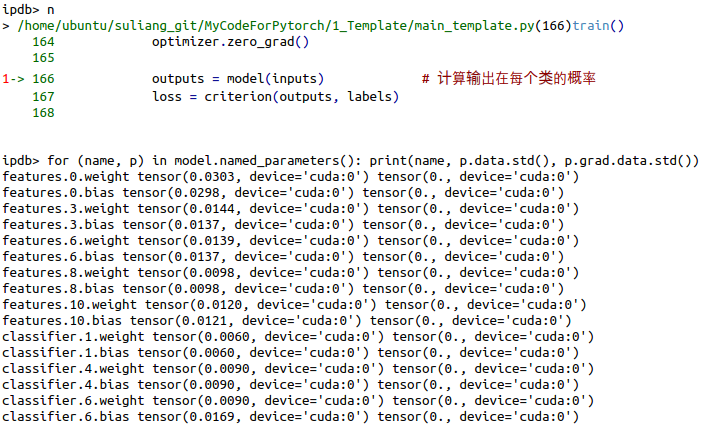

* 第一步： outputs = model(inputs) 计算输出在每个类的概率

输出基于batch进行更新，但参数不变，梯度清零后也不变

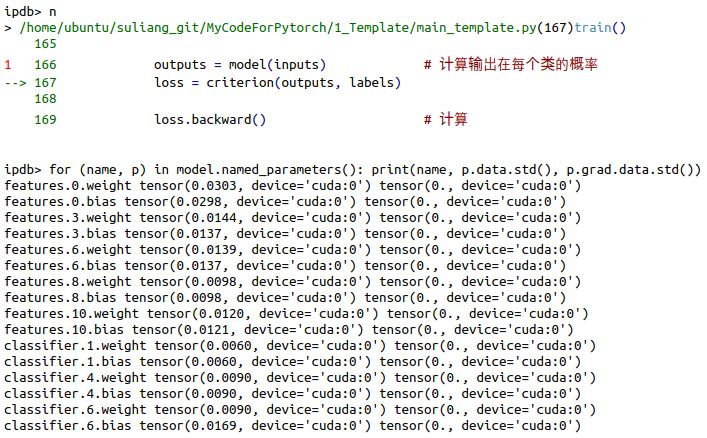

* 第二步： loss = criterion(outputs, labels)  计算最终的输出loss  

loss基于outputss的更新相应也更新，但参数不变，梯度清零后也不变

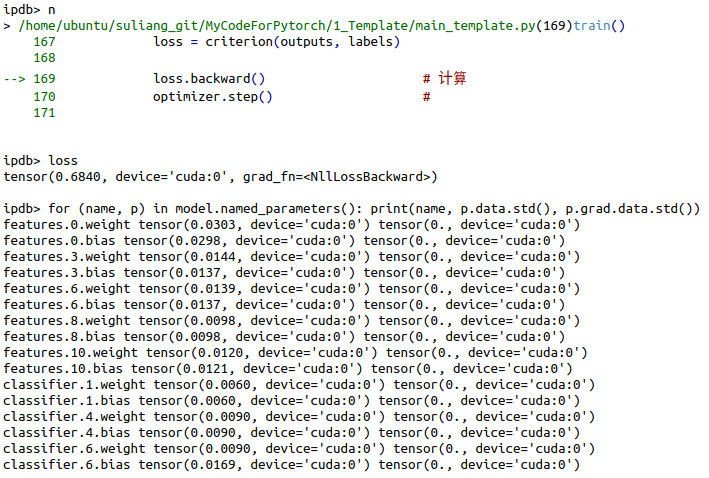

* 第三步： loss.backward() 基于神经网络算法， 已知输出loss反向推导出每一层的参数梯度

每层的每个参数的梯度基于loss进行更新，但参数还不更新。该处可以查看是否有发生梯度消散或者梯度爆炸。

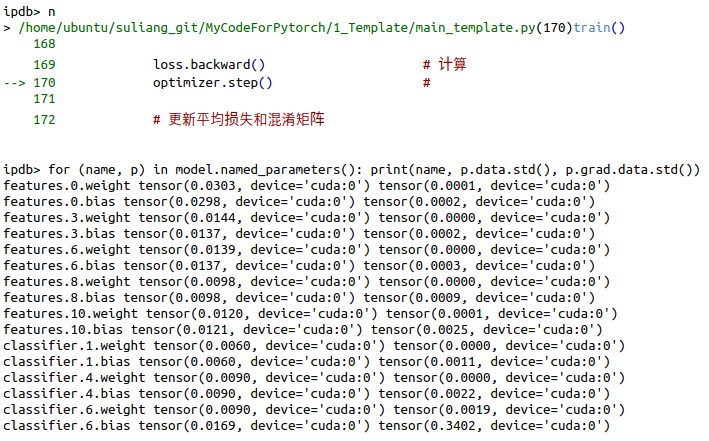

* 第四步： optimizer.step() 基于梯度，更新每一层的参数

由于batch的数据量有限，loss在每个batch变化都很小，所以相应的参数变化也很小，虽然更新但几乎看不出来。

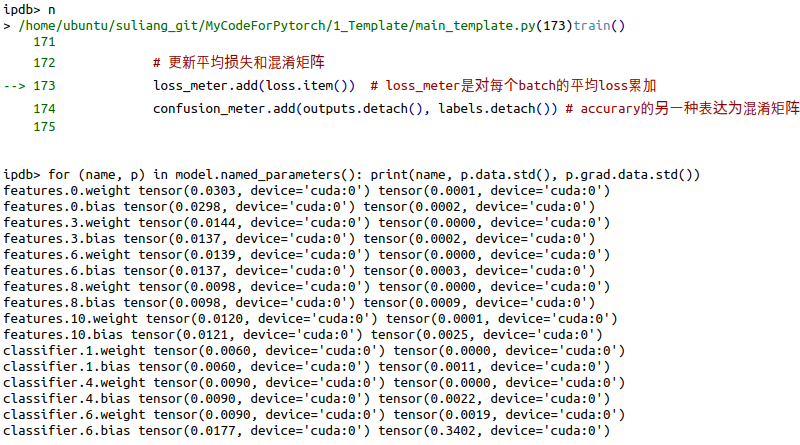